# Stage2 機械学習Report 
##### (線形回帰モデル/非線形回帰モデル/ロジスティック回帰モデル/主成分分析/アルゴリズム/サポートベクターマシーン)

## 回帰問題
### 入力（離散または連続値）から出力を予測する問題
#### 　線形で予測　------> 　線形回帰モデル
#### 非線形で予測　------> 非線形回帰モデル
#### 
#### 回帰で扱うデータ
##### 入力(説明変数または特徴量）  
#### &emsp;&emsp; $ x= (x_1 , x_2 , \cdots ,x_m )^ \mathrm{T} \in  \mathbb{R}^m  $  
#### 出力(目的変数）  
#### &emsp;&emsp; $ y \in \mathbb{R}^1  $  
## 1.線形回帰モデル  
#### 教師あり学習
#### 入力とm次元パラメータの線形結合を出力するモデル  
##### パラメータ　$ \boldsymbol{w} = (w_1,w_2, \cdots , w_m )^ \mathrm{T} )\in  \mathbb{R}^m $  
##### 線形結合　$ \hat{y} = w^ \mathrm{T} x + w_0 =\sum _{j=1} ^{m} {w_jx_j} + w_0 $  
#####  (モデルの出力値ベクトル)=(学習データの説明変数行列)×(回帰係数ベクトル)+(切片ベクトル)  
#### パラメータの更新方法：最小二乗法によって算出。


#### 線形結合とは、入力とパラメータの内積である。
###### $w $ パラメータ--->　重み(weight ), 切片(バイアス)を加えたもの。
###### 重みは正の値をつけると、特徴量を増加させる。負の値をつけると現象させる。
###### 大きい値だと影響力を増すことになる。
###### 入力ベクトルが多次元でも出力は一次元（スカラ）になる。

## 線形回帰モデル　ハンズオン

In [3]:
#from モジュール名 import クラス名（もしくは関数名や変数名）
from sklearn.datasets import load_boston
from pandas import DataFrame
import numpy as np
# ボストンデータを"boston"というインスタンスにインポート
boston = load_boston()
#インポートしたデータを確認(data / target / feature_names / DESCR)
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
#DESCR変数の中身を確認

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
###### 補足
# CRIM    : 町別の一人当たりの犯罪率 
# ZN      : 25,000平方フィートを超える区画にゾーニングされた住宅用地の割合。 
# INDUS   : 町ごとの非小売業のエーカーの割合 
# CHAS    : チャールズ川ダミー変数 (= 1 路が川に接する場合 ; 0 それ以外)
# NOX     : 一酸化窒素濃度 (ppm)
# RM      : 住居あたりの平均部屋数
# AGE     : 1940年より前に建てられた持ち家の割合
# DIS     : 5つのボストン雇用センターまでの加重距離 
# RAD     : 放射状高速道路へのアクセシビリティの指標 
# TAX     : 10,000ドルあたりの全額固定資産税率 
# PTRATIO : 町別の生徒と教師の比率 
# B       : 1000（Bk-0.63）^ 2ここで、Bkは町ごとの黒人の割合です 
# LSTAT   : 人口の％低いステータス 
# MEDV    : 1000ドルの持ち家の中央値 

#feature_names変数の中身を確認
#カラム名
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
#data変数(説明変数)の中身を確認
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [9]:
#target変数(目的変数)の中身を確認
print(boston['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### 2. データフレームの作成

In [23]:
#　説明変数らをDataFrameへ変換
df = DataFrame(data=boston.data, columns = boston.feature_names)
# 目的変数をDataFrameへ追加
df['PRICE'] = np.array(boston.target)
# 最初の5行を表示
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 線形単回帰分析

In [24]:
#カラムを指定してデータを表示
df[['RM']].head()
# 説明変数
data = df.loc[:, ['RM']].values
#dataリストの表示(1-5)
data[0:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [25]:
# 目的変数
target = df.loc[:, 'PRICE'].values
target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [26]:
## sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression
# オブジェクト生成
model = LinearRegression()
#model.get_params()
#model = LinearRegression(fit_intercept = True, normalize = False, copy_X = True,  n_jobs = 1)
# fit関数でパラメータ推定
model.fit(data, target)

LinearRegression()

In [27]:
#予測
model.predict([[1]])

array([-25.5685118])

### 重回帰分析(2変数)

In [28]:
#カラムを指定してデータを表示
df[['CRIM', 'RM']].head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [29]:
# 説明変数
data2 = df.loc[:, ['CRIM', 'RM']].values
# 目的変数
target2 = df.loc[:, 'PRICE'].values
#オブジェクト生成
model2 = LinearRegression()
# fit関数でパラメータ推定
model2.fit(data2, target2)
model2.predict([[0.2, 7]])

array([29.43977562])

### 回帰係数と切片の値を確認

In [30]:
# 単回帰の回帰係数と切片を出力
print('推定された回帰係数: %.3f, 推定された切片 : %.3f' % (model.coef_, model.intercept_))

推定された回帰係数: 9.102, 推定された切片 : -34.671


In [31]:
# 重回帰の回帰係数と切片を出力
print(model.coef_)
print(model.intercept_)

[9.10210898]
-34.67062077643857


### モデルの検証
#### 1. 決定係数

In [32]:
#### 決定係数
print('単回帰決定係数: %.3f, 重回帰決定係数 : %.3f' % (model.score(data,target), model2.score(data2,target2)))

単回帰決定係数: 0.484, 重回帰決定係数 : 0.542


In [33]:
# train_test_splitをインポート
from sklearn.model_selection import train_test_split

In [34]:
# 70%を学習用、30%を検証用データにするよう分割
X_train, X_test, y_train, y_test = train_test_split(data, target, 
test_size = 0.3, random_state = 666)
# 学習用データでパラメータ推定
model.fit(X_train, y_train)
# 作成したモデルから予測（学習用、検証用モデル使用）
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

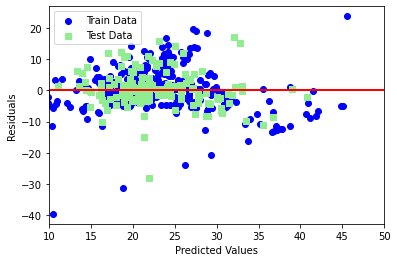

In [46]:
# matplotlibをインポート
import matplotlib.pyplot as plt
# Jupyterを利用していたら、以下のおまじないを書くとnotebook上に図が表示
%matplotlib inline
# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([10, 50])
plt.show()

## 2,非線形回帰モデル

##### 　2.1 線形回帰モデルと非線形回帰モデルの違い。  
##### &emsp;&emsp;　　　線形回帰モデル：回帰係数。  
##### &emsp;&emsp;　　　非線形回帰モデル：回帰関数。 
##### &emsp;&emsp;&emsp;&emsp;　回帰関数は、概ね  、多項式関数やガウス型基底関数を使用される。  
#####  &emsp;&emsp;&emsp;   基底展開法。  
#####  &emsp;&emsp;&emsp;&emsp;　回帰関数して、基底関数と呼ばれる既知の非線形関数とパラメータベクトルの線形結合を使用  
#####  &emsp;&emsp; 　未知パラメータは最小２乗法や最尤法により推定  

#####   &emsp;&emsp;&emsp;　$ y_i$ = f( $x_i$ ) + $\varepsilon_i  $ &emsp;&emsp;&emsp;    $    y_i$ = $\omega_0 + - \sum _{j=1} ^{m} \omega_j \phi_j(x_i) + \varepsilon_i $ 

##### 　2.2 未学習と過学習  
##### &emsp;&emsp;学習データに対して十分小さな誤差が得られないモデル　&rarr;  &emsp;未学習  
##### &emsp;&emsp;&emsp;&emsp; (対策) モデルの表現力が低いため、表現力の高いモデルを利用する。  
##### &emsp;&emsp;小さな誤差は得られたけど、テスト集合誤差との差が大きいモデル &rarr;  &emsp;過学習(過剰適合)
#####  &emsp;&emsp;&emsp;&emsp; (対策) 学習データの数を増やす。  
#####  &emsp;&emsp;&emsp;&emsp; (対策) 不要な規定関数(変数）を削除して表現を抑止  
#####  &emsp;&emsp;&emsp;&emsp; (対策) 正則化法を利用して表現力を抑止  
#####    2.3 正則化  
#####  &emsp;&emsp; L1ノルム Lasso推定量 ：幾つかのパラメータを正確に0に推定(スパース化）
#####  &emsp;&emsp; L2ノルム Rdign推定量 ：パラメータを0に近づけるように推定
#####    2.4 汎化性能
#####  &emsp;&emsp; 汎化性能：学習に使用した入力(学習データ）だけではなく、それ以外のデータでどれだけ適合できるか。
#####  &emsp;&emsp;訓練誤差
#####  &emsp;&emsp; $MSE_{train} $ =  $ \frac{1}{n_{train}} \sum _{i=1} ^{n_train} ( \hat y_i^{(train)} - y_i^{(train)} )^2 $   
#####  &emsp;&emsp;テスト誤差
#####  &emsp;&emsp; $MSE_{test} $ =  $ \frac{1}{n_{test}} \sum _{i=1} ^{n_test} ( \hat y_i^{(test)} - y_i^{(test)} )^2 $ 
##### 2.5 データ分割
##### &emsp;&emsp; 誤差を評価するため、学習用データと検証用データを分割することが必要。
##### &emsp;&emsp;&emsp; ホールドアウト法　：
##### &emsp;&emsp;&emsp; クロスバリデーション(交差検証）
##### &emsp;&emsp;&emsp; データをn分割し、(n-1)/nを学習用データ、1/nを検証用データに使用し学習用と検証データを変更して、モデルの性能検証を行う。精度の平均値をCV値と呼ぶ。

### 非線形回帰モデル　ハンズオン

No handles with labels found to put in legend.


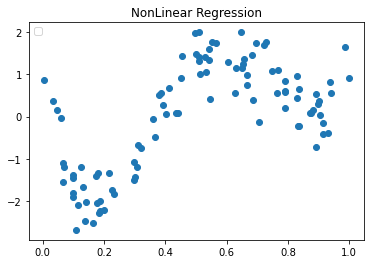

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z 
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# 　ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target)

plt.title('NonLinear Regression')
plt.legend(loc=2)

0.37913539681680397


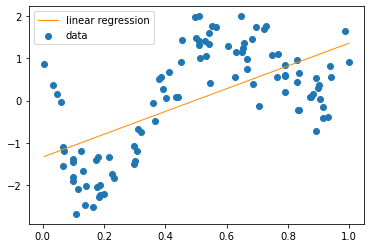

In [5]:
##### 補足（線形回帰モデル）
##### 補足 scikit-learnモデル
##### https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model


from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

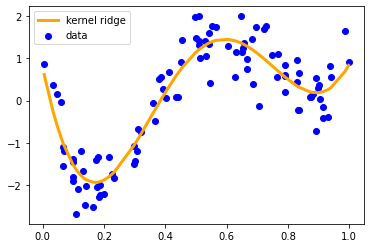

In [6]:
##### 補足(非線形回帰モデル)
####   https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html

from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

0.8382846663864303


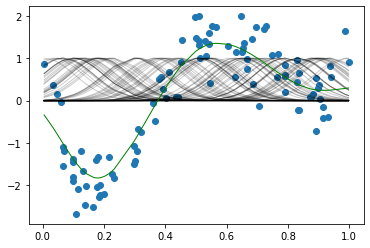

In [7]:
#Ridge


from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

#clf = LinearRegression()
clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
#plt.legend()

print(clf.score(kx, target))

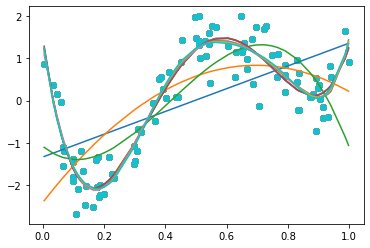

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline#PolynomialFeatures(degree=1)

deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

-2.220446049250313e-16


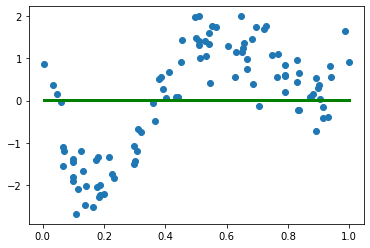

In [9]:
#Lasso
##### 補足説明　L1正則化

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=10000, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


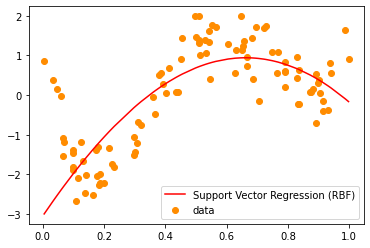

In [10]:
from sklearn import model_selection, preprocessing, linear_model, svm

# SVR-rbf
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
# plot

plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)
!pip3 install tensorflow
!pip3 install keras
import keras
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
#### 補足　Dドライブ配下にdataを格納(オリジナルからPath変更)
cb_cp = ModelCheckpoint('D:\stage2_data\study_ai_ml_google\skl_ml\out\checkpoints\weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='D:\stage2_data\study_ai_ml_google\skl_ml\out\TensorBoard', histogram_freq=0)

In [12]:
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)
history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))
y_pred = estimator.predict(x_train)

Epoch 1/100
18/18 [==============================] - 4s 119ms/step - loss: 1.6375 - val_loss: 0.9396

Epoch 00001: saving model to D:\stage2_data\study_ai_ml_google\skl_ml\out\checkpoints\weights.01-0.94.hdf5
Epoch 2/100
18/18 [==============================] - 1s 41ms/step - loss: 1.1743 - val_loss: 0.7098

Epoch 00002: saving model to D:\stage2_data\study_ai_ml_google\skl_ml\out\checkpoints\weights.02-0.71.hdf5
Epoch 3/100
18/18 [==============================] - 1s 37ms/step - loss: 0.9075 - val_loss: 0.7408

Epoch 00003: saving model to D:\stage2_data\study_ai_ml_google\skl_ml\out\checkpoints\weights.03-0.74.hdf5
Epoch 4/100
18/18 [==============================] - 1s 36ms/step - loss: 0.8607 - val_loss: 0.5137

Epoch 00004: saving model to D:\stage2_data\study_ai_ml_google\skl_ml\out\checkpoints\weights.04-0.51.hdf5
Epoch 5/100
18/18 [==============================] - 1s 38ms/step - loss: 0.5673 - val_loss: 0.4172

Epoch 00005: saving model to D:\stage2_data\study_ai_ml_google\skl

In [13]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)
history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))
y_pred = estimator.predict(x_train)

Epoch 1/100
18/18 [==============================] - 2s 77ms/step - loss: 1.5962 - val_loss: 1.1246

Epoch 00001: saving model to D:\stage2_data\study_ai_ml_google\skl_ml\out\checkpoints\weights.01-1.12.hdf5
Epoch 2/100
18/18 [==============================] - 1s 37ms/step - loss: 1.3109 - val_loss: 1.1898

Epoch 00002: saving model to D:\stage2_data\study_ai_ml_google\skl_ml\out\checkpoints\weights.02-1.19.hdf5
Epoch 3/100
18/18 [==============================] - 1s 37ms/step - loss: 1.3034 - val_loss: 1.1117

Epoch 00003: saving model to D:\stage2_data\study_ai_ml_google\skl_ml\out\checkpoints\weights.03-1.11.hdf5
Epoch 4/100
18/18 [==============================] - 1s 36ms/step - loss: 0.9503 - val_loss: 0.7907

Epoch 00004: saving model to D:\stage2_data\study_ai_ml_google\skl_ml\out\checkpoints\weights.04-0.79.hdf5
Epoch 5/100
18/18 [==============================] - 1s 36ms/step - loss: 0.7618 - val_loss: 0.6952

Epoch 00005: saving model to D:\stage2_data\study_ai_ml_google\skl_

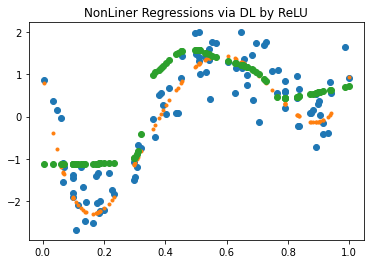

In [14]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o')
plt.plot(data, true_func(data), '.')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')
#plt.legend(loc=2)

In [15]:
print(lasso_clf.coef_)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


## 3.ロジスティック回帰モデル


#### &emsp;3.1ロジスティック回帰モデル　
#####  &emsp;　教師あり学習のひとつで分類問題(クラス分類）を扱うときに使用する。
####  &emsp; 分類で扱うデータ
##### 　入力（説明変数または特徴量）：m次元のベクトル
##### 　出力（目的変数）　　　　　　：　0 or 1の値
##### &emsp;&emsp; パラメータ：　$w$ = $(w_1,w_2 , \cdots , w_m )^T \in \mathbb{R}^m$ 
##### &emsp;&emsp;線形結合　 ：　$\hat y$ = $w^T x + w_0 $ = $  \sum _{j=1} ^{m} w_j x_j +w_0$ 
##### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;出力yは０～１の値。Yの値算出のため活性化関数を使用する。
#### 3.1.2 シグモイド関数
####  &emsp;&emsp; &emsp;&emsp; $ \sigma(x) $ = $\frac{1}{1+\exp(-ax)}$ パラメータが変わるとシグモイド関数の形が変わる
#####   &emsp;&emsp; &emsp;&emsp; シグモイド関数の性質
#####   &emsp;シグモイド関数の微分は、シグモイド関数自身で表現することが可能
####    &emsp;&emsp; &emsp;&emsp; $ \frac{\partial \sigma(x) }{\partial x} $ = $ \frac{\partial}{\partial x}$  ($ \frac{1}{1+\exp(-ax)}$ )
####  &emsp;&emsp;&emsp;&emsp;   = $ a \sigma(x) (1 - \sigma(x)) $
####  &emsp; シグモイド関数の出力をY=1になる確率
#### &emsp;&emsp;&emsp;&emsp;  $ P(Y = 1  \mid x ) $ = $ \sigma(w_0 + w_1 x_1 + \cdots + w_m x_m ) $

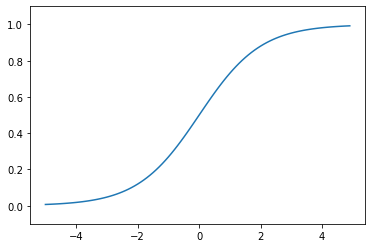

In [9]:
#####　シグモイド関数 (a=1.0)
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0,dtype=np.int)

def sigmoid(x):
    return 1/(1+np.exp(-x))

#x= np.arrary([-1.0,1.0,2.0])
#print(x)
#print(sigmoid(x))


x=np.arange(-5.0 ,5.0,0.1)
# y=step_function(x)
y =sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1) # y-axis
plt.show()

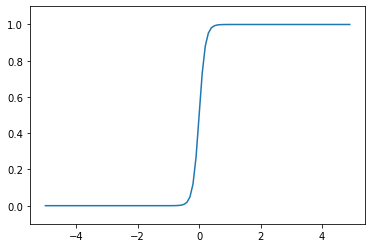

In [10]:
#####　シグモイド関数 (a=10)
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0,dtype=np.int)

def sigmoid(x):
    return 1/(1+np.exp(-10 *x))

#x= np.arrary([-1.0,1.0,2.0])
#print(x)
#print(sigmoid(x))


x=np.arange(-5.0 ,5.0,0.1)
# y=step_function(x)
y =sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1) # y-axis
plt.show()

#### 3.1.3 最尤推定
##### &emsp;&emsp;&emsp; 確率分布 (正規分布、t分布、ガンマ分布、一様分布、ディリクレ分布)
##### &emsp;&emsp;&emsp; &emsp; 　ロジスティック回帰モデルではベルヌーイ分布を利用
#### 3.1.3.1 ベルヌーイ分布
#####   離散確率分布(例：コインを投げ)
##### &emsp;&emsp; 数学において、確率pで1、確率1 − p で0をとる、離散確率分布
###### &emsp;&emsp;&emsp;&emsp;$P(x \mid \mu ）= \mu^x (1- \mu) ^{1-x} $
###### 同時確率 :あるデータが得られた時、それが同時に得られる確率
###### 尤度関数: データは固定し、パラメータを変化させる
###### 尤度関数を最大化するようなパラメータを選ぶ推定方法 -> 最尤推定
###### 尤度関数を最大とするパラメータを探す(推定)
###### $ E(w_0,W_1,\cdots,w_m) $ = $ - \sum _{i=1} ^{n} {y_i \log p_i+(1-y_i)\log(1-p_i)} $
#### 3.1.4 確率的勾配降下法(SGD)
###### データを一つずつランダムに(「確率的」に)選んでパラメータを更新
###### （全てのデータを使って計算すると計算量が膨大になるため。）
###### &emsp;&emsp;&emsp; $ \omega ( k+1 ) $ $ \omega _k + n ( y_i -p_i ) x_i $
#### 3.1.5 評価方法(混同行列)
###### TP: 真陽性(True Positive)   　正しくpositiveと判別した個数
###### FP :偽陰性(False Positive) 　間違えてpositiveと判別した個数
###### TN :真陰性(True Negative) 　正しくNegativeと判別した個数
###### FN : 偽陽性(False Negative)  間違えてNegativeと判別した個数

#####  正解率：正解した数/ 予測対象となった全データ数 
#####  &emsp;&emsp;&emsp;  $\frac {TP+TN}{TP+FN+FP+TN} $
#####  再現率(Recall)：「本当にPositiveなもの」の中からPositiveと予測できる割合
#####  &emsp;&emsp;&emsp;  $\frac  {TP}{TP+FN} $
#####  →　失敗が許されない現場で使用

#####  適合率(Precision)：　モデルが「Positiveと予測」したものの中で本当にPositiveである割合
#####  &emsp;&emsp;&emsp;  $\frac  {TP}{TP+FP} $
#####  Ｆ値(F value)　：適合率と再現率の中庸を取る
#####  &emsp;&emsp;&emsp; $ \frac {2}{(\frac{1}{Precision} + \frac{1}{Recall}) } $

### 3.2 ロジスティック回帰モデル　ハンズオン
####  設定：タイタニックの乗客データを利用しロジスティック回帰モデルを作成
####  &emsp;&emsp;&emsp;  特徴量抽出をしてみる。
###  &emsp;&emsp;&emsp;課題：年齢が30歳で男性の乗客は生き残れるか？
####  &emsp;&emsp;&emsp;&emsp;&emsp;  ->　生存率 20%程度よって、死亡(0)と予測。

In [ ]:
## 補足 (説明変数の説明)
## PassengerID  乗客 ID
## Survived     生存フラグ(0=死亡, 1=生存)
## Pclass       チケットクラス(1=上層, 2=中層, 3=下層)
## Name         氏名
## Sex          性別(male=男性, female=女性)
## Age          年齢
## SibSp        同乗している兄弟や配偶者の数 (0, 1, 2, 3, 4, 5, 8)
## Parch        同乗している両親や子供の数   (0, 1, 2, 3, 4, 5, 6, 9)
## Ticket       チケット番号
## Fare         料金
## Cabin        客室番号
## Embarked     タイタニックへ乗った港(C=Cherbourg, Q=Queenstown, S=Southampton)

### https://qiita.com/shibata0523/items/894f7e97cf4e648ed56e

## 0. データ表示

In [63]:
#from モジュール名 import クラス名（もしくは関数名や変数名）
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlibをinlineで表示するためのおまじない (plt.show()しなくていい)
%matplotlib inline

In [64]:
#### 補足　Dドライブ配下にdataを格納(オリジナルからPath変更)

# titanic data csvファイルの読み込み
titanic_df = pd.read_csv('D:\stage2_data\study_ai_ml_google\data/titanic_train.csv')

In [65]:
# ファイルの先頭部を表示し、データセットを確認する
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
## 1. ロジスティック回帰
## 不要なデータの削除・欠損値の補完

In [67]:
#予測に不要と考えるからうをドロップ (本当はここの情報もしっかり使うべきだと思っています)
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#一部カラムをドロップしたデータを表示
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [68]:
#nullを含んでいる行を表示
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [69]:
#Ageカラムのnullを中央値で補完

titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

#再度nullを含んでいる行を表示 (Ageのnullは補完されている)
titanic_df[titanic_df.isnull().any(1)]

#titanic_df.dtypes

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,29.699118
863,0,3,female,NaN,8,2,69.5500,S,29.699118
868,0,3,male,NaN,0,0,9.5000,S,29.699118
878,0,3,male,NaN,0,0,7.8958,S,29.699118


In [70]:
## 1. ロジスティック回帰
## 実装(チケット価格から生死を判別)
#運賃だけのリストを作成
data1 = titanic_df.loc[:, ["Fare"]].values
#生死フラグのみのリストを作成
label1 =  titanic_df.loc[:,["Survived"]].values

In [71]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(data1, label1)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [72]:
model.predict([[61]])

array([0], dtype=int64)

In [73]:
model.predict_proba([[62]])

array([[0.49978123, 0.50021877]])

In [74]:
X_test_value = model.decision_function(data1) 

In [75]:
# # 決定関数値（絶対値が大きいほど識別境界から離れている）
# X_test_value = model.decision_function(X_test) 
# # 決定関数値をシグモイド関数で確率に変換
# X_test_prob = normal_sigmoid(X_test_value) 
print (model.intercept_)
print (model.coef_)

[-0.94131796]
[[0.01519666]]


No handles with labels found to put in legend.


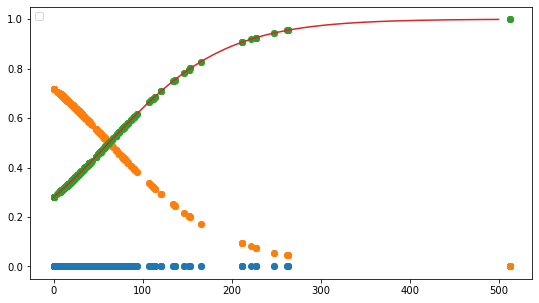

In [76]:
w_0 = model.intercept_[0]
w_1 = model.coef_[0,0]

# def normal_sigmoid(x):
#     return 1 / (1+np.exp(-x))

def sigmoid(x):
    return 1 / (1+np.exp(-(w_1*x+w_0)))

x_range = np.linspace(-1, 500, 3000)

plt.figure(figsize=(9,5))
#plt.xkcd()
plt.legend(loc=2)


# plt.ylim(-0.1, 1.1)
# plt.xlim(-10, 10)

# plt.plot([-10,10],[0,0], "k", lw=1)
# plt.plot([0,0],[-1,1.5], "k", lw=1)
plt.plot(data1,np.zeros(len(data1)), 'o')
plt.plot(data1, model.predict_proba(data1), 'o')
plt.plot(x_range, sigmoid(x_range), '-')
#plt.plot(x_range, normal_sigmoid(x_range), '-')
#




In [77]:
## 1. ロジスティック回帰
## 実装(2変数から生死を判別)
#AgeFillの欠損値を埋めたので
#titanic_df = titanic_df.drop(['Age'], axis=1)
titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1
1,1,1,female,38.0,1,0,71.2833,C,38.0,0
2,1,3,female,26.0,0,0,7.9250,S,26.0,0


In [78]:
titanic_df['Pclass_Gender'] = titanic_df['Pclass'] + titanic_df['Gender']
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender,Pclass_Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1,4
1,1,1,female,38.0,1,0,71.2833,C,38.0,0,1
2,1,3,female,26.0,0,0,7.9250,S,26.0,0,3
3,1,1,female,35.0,1,0,53.1000,S,35.0,0,1
4,0,3,male,35.0,0,0,8.0500,S,35.0,1,4


In [79]:
titanic_df = titanic_df.drop(['Pclass', 'Sex', 'Gender','Age'],axis=1)
titanic_df.head()

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3
3,1,1,0,53.1000,S,35.0,1
4,0,0,0,8.0500,S,35.0,4


In [80]:
titanic_df.head()

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3
3,1,1,0,53.1000,S,35.0,1
4,0,0,0,8.0500,S,35.0,4


In [81]:
# 重要だよ！！！
# 境界線の式
#   w_1・x + w_2・y + w_0 = 0
#   ⇒ y = (-w_1・x - w_0) / w_2
 
# # 境界線 プロット
# plt.plot([-2,2], map(lambda x: (-w_1 * x - w_0)/w_2, [-2,2]))
 
# # データを重ねる
# plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
# plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
# plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
# plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

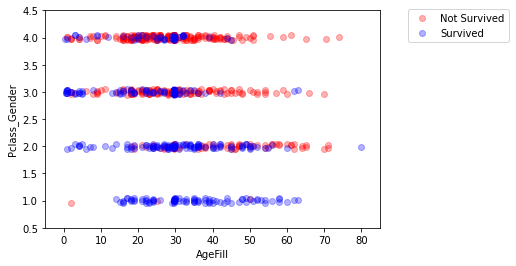

In [82]:
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

index_survived = titanic_df[titanic_df["Survived"]==0].index
index_notsurvived = titanic_df[titanic_df["Survived"]==1].index

from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))

In [83]:
#運賃だけのリストを作成
data2 = titanic_df.loc[:, ["AgeFill", "Pclass_Gender"]].values
data2

array([[22.        ,  4.        ],
       [38.        ,  1.        ],
       [26.        ,  3.        ],
       ...,
       [29.69911765,  3.        ],
       [26.        ,  2.        ],
       [32.        ,  4.        ]])

In [84]:
#生死フラグのみのリストを作成
label2 =  titanic_df.loc[:,["Survived"]].values
model2 = LogisticRegression()
model2.fit(data2, label2)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [85]:
model2.predict([[10,1]])

array([1], dtype=int64)

In [86]:
model2.predict_proba([[10,1]])

array([[0.03754749, 0.96245251]])

In [87]:
titanic_df.head(3)

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3


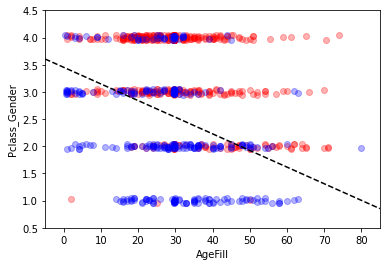

In [88]:
h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
Z = model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
levels = np.linspace(0, 1.0)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#contour = ax.contourf(xx, yy, Z, cmap=cm, levels=levels, alpha=0.5)

sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)

ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#fig.colorbar(contour)

x1 = xmin
x2 = xmax
y1 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmin)/model2.coef_[0][1]
y2 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmax)/model2.coef_[0][1]
ax.plot([x1, x2] ,[y1, y2], 'k--')

In [89]:
## 2. モデル評価
## 混同行列とクロスバリデーション

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
traindata1, testdata1, trainlabel1, testlabel1 = train_test_split(data1, label1, test_size=0.2)
traindata1.shape
trainlabel1.shape

(712, 1)

In [92]:
traindata2, testdata2, trainlabel2, testlabel2 = train_test_split(data2, label2, test_size=0.2)
traindata2.shape
trainlabel2.shape
#本来は同じデータセットを分割しなければいけない。(簡易的に別々に分割している。)

(712, 1)

In [93]:
data = titanic_df.loc[:, ].values
label =  titanic_df.loc[:,["Survived"]].values
traindata, testdata, trainlabel, testlabel = train_test_split(data, label, test_size=0.2)
traindata.shape
trainlabel.shape

(712, 1)

In [94]:
eval_model1=LogisticRegression()
eval_model2=LogisticRegression()
#eval_model=LogisticRegression()
predictor_eval1=eval_model1.fit(traindata1, trainlabel1).predict(testdata1)
predictor_eval2=eval_model2.fit(traindata2, trainlabel2).predict(testdata2)
#predictor_eval=eval_model.fit(traindata, trainlabel).predict(testdata)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [95]:
eval_model1.score(traindata1, trainlabel1)

0.6643258426966292

In [96]:
eval_model1.score(testdata1,testlabel1)

0.6759776536312849

In [97]:
eval_model2.score(traindata2, trainlabel2)

0.7752808988764045

In [98]:
eval_model2.score(testdata2,testlabel2)

0.7821229050279329

In [99]:
from sklearn import metrics
print(metrics.classification_report(testlabel1, predictor_eval1))
print(metrics.classification_report(testlabel2, predictor_eval2))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79       116
           1       0.63      0.19      0.29        63

    accuracy                           0.68       179
   macro avg       0.66      0.57      0.54       179
weighted avg       0.66      0.68      0.61       179

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       113
           1       0.75      0.62      0.68        66

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.78      0.78      0.78       179



In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix1=confusion_matrix(testlabel1, predictor_eval1)
confusion_matrix2=confusion_matrix(testlabel2, predictor_eval2)
confusion_matrix1

array([[109,   7],
       [ 51,  12]], dtype=int64)

In [101]:
confusion_matrix2

array([[99, 14],
       [25, 41]], dtype=int64)

<AxesSubplot:>

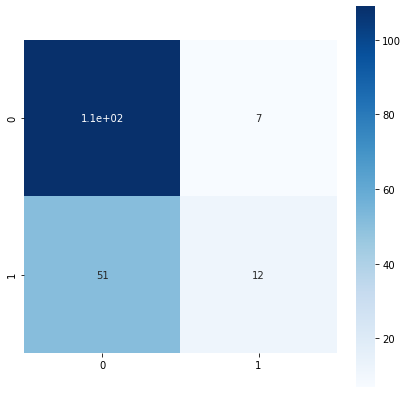

In [102]:
fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix1,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

<AxesSubplot:>

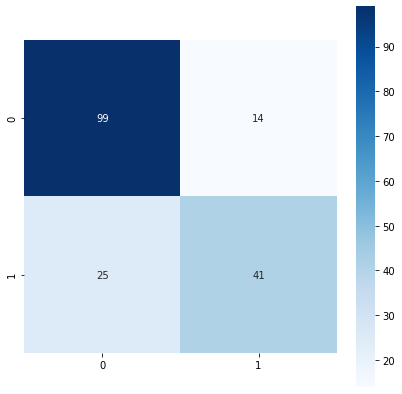

In [103]:
fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix2,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


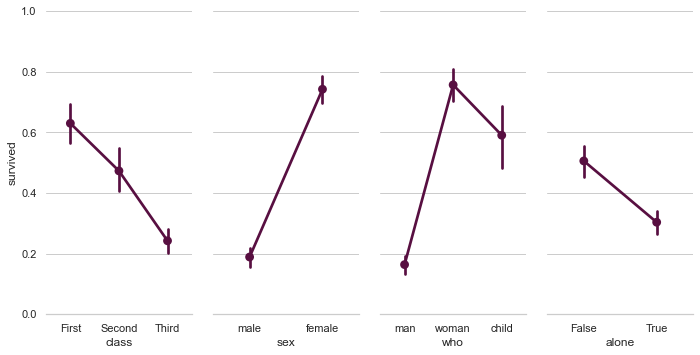

In [104]:
#Paired categorical plots

import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 size=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

plt.show()

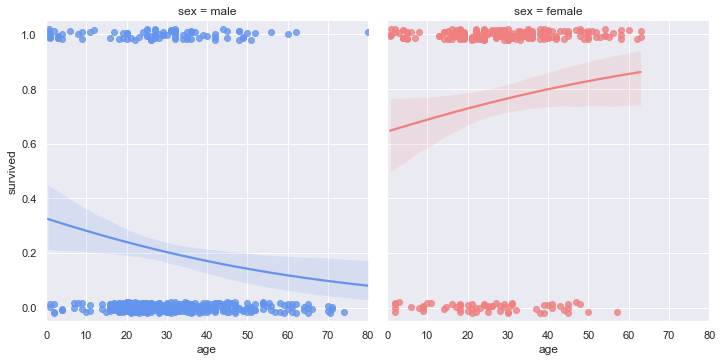

In [105]:
#Faceted logistic regression

import seaborn as sns
sns.set(style="darkgrid")

# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))
plt.show()

## 4.主成分分析

###  4.1 主成分分析 Report 
### &emsp;&emsp;&emsp; 4.1.1 主成分分析とは？
#### 多変量データの持つ構造をより少数個の指標に圧縮。
##### 　簡単にいうと、
#####      多次元のデータだと人間で分析（可視化）出来ないので次元を減らしく分析しやすくすること。
##### &emsp;&emsp;　主成分分析は共分散行列の固有値問題を解くことにより、データの主成分を見つける。
##### &emsp;&emsp;  主成分とは、分散が最大になる方向へ射影するベクトル
#####  &emsp;&emsp; カンタンにいうと、
#####  &emsp;&emsp;&emsp; データの塊(集合)に、直線上へplotした場合、直線上にデータが乗っている長さ（分散）が長い傾き(ベクトル）
##### &emsp;&emsp;  4.1.2 線形変換後のベクトル：$ s_j $ = $ (s1_j,\cdots , sn_j)^T $ = $\bar{X} a_j $ &emsp;&emsp;  &emsp;&emsp;  $ a_j \in  \mathbb{R}^m $
#####  &emsp;&emsp; 線形変換後の分散
###  &emsp;&emsp;&emsp; $Var(s_j) $ = $\frac {1}{n}s_{j} ^{T} s_j $ = $ \frac{1}{n}a_{j}^{T} \bar{X}^T \bar{X} a_j = a_{j}^{T} Var( \bar{X} ) a_j $
#####   テキストが間違っているので注意！！(ビデオ中で訂正あり）
###### &emsp;&emsp; 4.1.3 目的関数：arg max    a_{j}^{T} Var( \bar{X} ) a_j 
######  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $ a_j \in  \mathbb{R}^m $ <--　一つの上の行のmaxにかかってます。
###### &emsp;&emsp; &emsp;制約条件  $ a_{j}^{T} = 1 $  <---- 制約がついている理由は、制約つけないと、無制限に固定ベクトルが存在するから。
###### &emsp;&emsp; 4.1.4 ラグランジュ関数を微分して最適解を求める：
###### &emsp;&emsp; &emsp;&emsp;  ：　$ Var ( \bar {X} ) a_j = \lambda a_j $
###### &emsp;&emsp;4.1.5 寄与率：
###### &emsp;&emsp;&emsp;&emsp; 圧縮して可視化出来ても、データの損失量が多いと使えない（実態）ので、どの程度データとして表現できているか。
######  &emsp;&emsp;&emsp;&emsp; 寄与率：第k主成分の分散の全分散に対する割合(第k主成分が持つ情報量の割合
######  &emsp;&emsp;&emsp;&emsp; 累積寄与率：第1-k主成分まで圧縮した際の情報損失量の割合
######  &emsp;&emsp;&emsp;&emsp; 累積寄与率が有るのは、n次元単独の損失を見るわけではなく、すべて(1～n次元)の主成分として見るため。

##### 
### 4.2 主成分分析　ハンズオン
#### 設定：乳がん検査データを利用しロジスティック回帰モデルを作成
#### &emsp;&emsp;&emsp; 主成分を利用し２次元空間上に次元圧縮
#### &emsp;&emsp;&emsp; 課題: 32次元のデータを２次元上に次元圧縮した最、うまく判別できるかを確認
##### ハンズオンのポイント：
#####  &emsp;&emsp;&emsp; PythonでPCAを行うにはscikit-learnを使用します。
#####   &emsp;&emsp;&emsp; n_componentsはcomponentの数です。（何も設定しないとデータの次元数になる。）
#####   &emsp;&emsp;&emsp; fitに引き渡せば次元削減になる。
#####   &emsp;&emsp; https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### 補足　Dドライブ配下にdataを格納(オリジナルからPath変更)
cancer_df = pd.read_csv('D:\stage2_data\study_ai_ml_google\data\cancer.csv')

In [3]:
print('cancer df shape: {}'.format(cancer_df.shape))

cancer df shape: (569, 33)


In [4]:
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
cancer_df.drop('Unnamed: 32', axis=1, inplace=True)
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
## ・diagnosis: 診断結果 (良性がB / 悪性がM) ・説明変数は3列以降、目的変数を2列目としロジスティック回帰で分類

In [7]:
# 目的変数の抽出
y = cancer_df.diagnosis.apply(lambda d: 1 if d == 'M' else 0)
# 説明変数の抽出
X = cancer_df.loc[:, 'radius_mean':]
# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰で学習
logistic = LogisticRegressionCV(cv=10, random_state=0)
logistic.fit(X_train_scaled, y_train)

# 検証
print('Train score: {:.3f}'.format(logistic.score(X_train_scaled, y_train)))
print('Test score: {:.3f}'.format(logistic.score(X_test_scaled, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_scaled))))

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Train score: 0.988
Test score: 0.972
Confustion matrix:
[[89  1]
 [ 3 50]]


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

<BarContainer object of 30 artists>

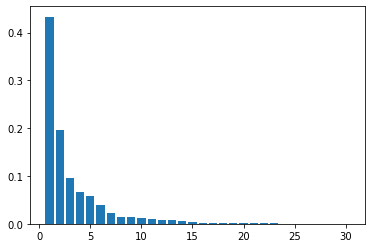

In [8]:
## ・検証スコア97%で分類できることを確認
pca = PCA(n_components=30)
pca.fit(X_train_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

X_train_pca shape: (426, 2)
explained variance ratio: [0.43315126 0.19586506]


Text(0, 0.5, 'PC 2')

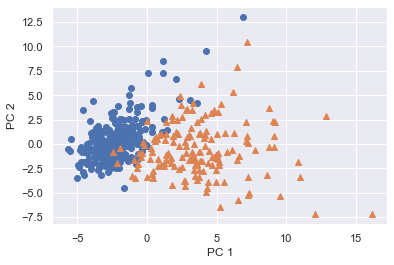

In [133]:
# PCA
# 次元数2まで圧縮
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
print('X_train_pca shape: {}'.format(X_train_pca.shape))
# X_train_pca shape: (426, 2)

# 寄与率
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))
# explained variance ratio: [ 0.43315126  0.19586506]

# 散布図にプロット
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o') # 良性は○でマーク
plt.scatter(x=m[0], y=m[1], marker='^') # 悪性は△でマーク
plt.xlabel('PC 1') # 第1主成分をx軸
plt.ylabel('PC 2') # 第2主成分をy軸

## 5.K近傍法/K-means
### &emsp;&emsp; 5.1 K近傍法
#### &emsp;&emsp;&emsp; 5.1 K近傍法Report 
#### &emsp;&emsp;&emsp; 5.1.1 K近傍法とは
#### &emsp;&emsp;&emsp;&emsp;&emsp; 教師あり学習のひとつで分類問題を近くにあるサンプルの数で多数決を取る。
#### &emsp;&emsp;&emsp;&emsp;&emsp; 多数決の個数は値で決める。K=1が再近傍法と呼ばれる。
#### &emsp;&emsp;&emsp;&emsp;&emsp;  最も決定境界が入り組んでいる。（Kを大きくすることで決定境界は滑らかになる。）
#### &emsp;&emsp;&emsp;&emsp;&emsp;距離計算は、主にユークリッド距離計算が使われる。（本ハンズオンも）
#### &emsp;&emsp;&emsp;&emsp;&emsp;　

### 5.1.2K近傍法ハンズオン

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [21]:
##### 訓練データ生成

def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

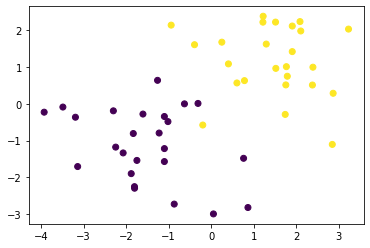

In [22]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

#### 学習　（特になし）

In [ ]:
#### 予測
#### 予測するデータ点との、距離が最も近い k 個の、訓練データのラベルの最頻値を割り当てる

In [23]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

def knc_predict(n_neighbors, x_train, y_train, X_test):
    y_pred = np.empty(len(X_test), dtype=y_train.dtype)
    for i, x in enumerate(X_test):
        distances = distance(x, X_train)
        nearest_index = distances.argsort()[:n_neighbors]
        mode, _ = stats.mode(y_train[nearest_index])
        y_pred[i] = mode
    return y_pred

def plt_resut(x_train, y_train, y_pred):
    xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    xx = np.array([xx0, xx1]).reshape(2, -1).T
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))

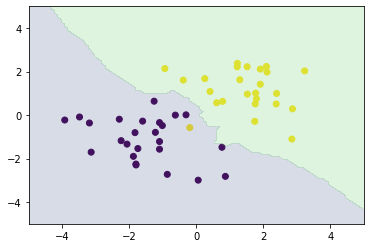

In [24]:
n_neighbors = 3

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

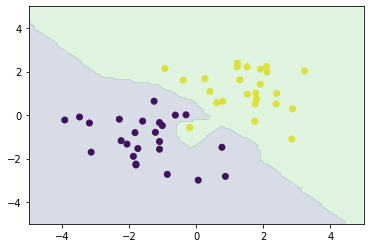

In [28]:
###### K=1でも実施
n_neighbors = 1

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

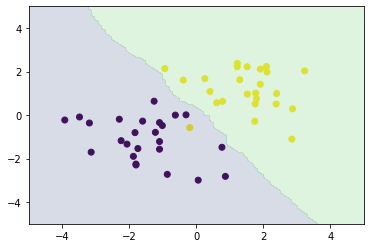

In [29]:
###### K=10でも実施
n_neighbors = 10

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

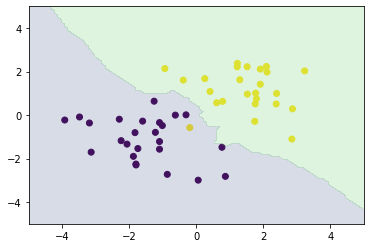

In [25]:
#### numpy実装
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, ys_train)
plt_resut(X_train, ys_train, knc.predict(xx))

###  5.2 k平均クラスタリング(k-means)
### &emsp;&emsp; 5.2.1 K平均クラスタリング(k-means) Report
### &emsp;&emsp;&emsp; 5.2.1 平均クラスタリングとは
#### &emsp;&emsp;&emsp; 平均クラスタリング(k-means)は教師なし学習(正解ラベルがついていない）で非階層型クラスタリングを行う手法。
#### &emsp; 5.2.2 k-meansアルゴリズム：

#####  &emsp;&emsp;&emsp;  1) 各クラスタ中心の初期値を設定する
#####  &emsp;&emsp;&emsp;   2) 各データ点に対して、各クラスタ中心との距離を計算し、
#####  &emsp;&emsp;&emsp;&emsp;&emsp;  最も距離が近いクラスタを割り当てる
#####  &emsp;&emsp;&emsp;   3) 各クラスタの平均ベクトル（中心）を計算する
#####  &emsp;&emsp;&emsp;  4) 収束するまで2, 3の処理を繰り返す

#### 5.2.3 k-meansで注意すべきこと
#####  &emsp;&emsp;&emsp; 初期値の取り方が重要。初期値が近いと収束しない場合が有る。
#####   &emsp;&emsp;&emsp; 改善アルゴリズム　K-means ++
#####   &emsp;&emsp;&emsp; 最初の中心点を距離が遠いほど確率的に選ばれやすくするアルゴリズム


####  5.2.2 k平均クラスタリング(k-means)ハンズオン

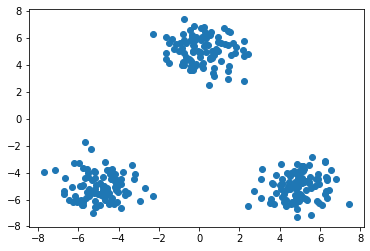

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
###### データ生成
def gen_data():
    x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    x3 = np.random.normal(size=(100, 2)) + np.array([0, 5])
    return np.vstack((x1, x2, x3))
#データ作成
X_train = gen_data()
#データ描画
plt.scatter(X_train[:, 0], X_train[:, 1])

In [10]:
####### k-meansアルゴリズムは以下のとおりである

####### 1) 各クラスタ中心の初期値を設定する

####### 2) 各データ点に対して、各クラスタ中心との距離を計算し、最も距離が近いクラスタを割り当てる

####### 3) 各クラスタの平均ベクトル（中心）を計算する

####### 4) 収束するまで2, 3の処理を繰り返す


In [11]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

n_clusters = 3
iter_max = 100

# 各クラスタ中心をランダムに初期化
centers = X_train[np.random.choice(len(X_train), n_clusters, replace=False)]

for _ in range(iter_max):
    prev_centers = np.copy(centers)
    D = np.zeros((len(X_train), n_clusters))
    # 各データ点に対して、各クラスタ中心との距離を計算
    for i, x in enumerate(X_train):
        D[i] = distance(x, centers)
    # 各データ点に、最も距離が近いクラスタを割り当
    cluster_index = np.argmin(D, axis=1)
    # 各クラスタの中心を計算
    for k in range(n_clusters):
        index_k = cluster_index == k
        centers[k] = np.mean(X_train[index_k], axis=0)
    # 収束判定
    if np.allclose(prev_centers, centers):
        break

####   クラスタリング結果

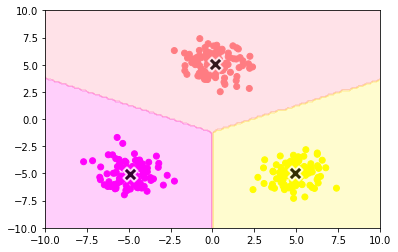

In [13]:
def plt_result(X_train, centers, xx):
    #　データを可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap='spring')
    # 中心を可視化
    plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")
    # 領域の可視化
    pred = np.empty(len(xx), dtype=int)
    for i, x in enumerate(xx):
        d = distance(x, centers)
        pred[i] = np.argmin(d)
    plt.contourf(xx0, xx1, pred.reshape(100, 100), alpha=0.2, cmap='spring')
y_pred = np.empty(len(X_train), dtype=int)
for i, x in enumerate(X_train):
    d = distance(x, centers)
    y_pred[i] = np.argmin(d)
xx0, xx1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

plt_result(X_train, centers, xx)

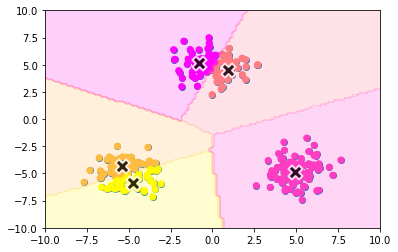

In [32]:
### k=5でも実施してみた。
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
###### データ生成
def gen_data():
    x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    x3 = np.random.normal(size=(100, 2)) + np.array([0, 5])
    return np.vstack((x1, x2, x3))
#データ作成
X_train = gen_data()
#データ描画
plt.scatter(X_train[:, 0], X_train[:, 1])
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

n_clusters = 5
iter_max = 100

# 各クラスタ中心をランダムに初期化
centers = X_train[np.random.choice(len(X_train), n_clusters, replace=False)]

for _ in range(iter_max):
    prev_centers = np.copy(centers)
    D = np.zeros((len(X_train), n_clusters))
    # 各データ点に対して、各クラスタ中心との距離を計算
    for i, x in enumerate(X_train):
        D[i] = distance(x, centers)
    # 各データ点に、最も距離が近いクラスタを割り当
    cluster_index = np.argmin(D, axis=1)
    # 各クラスタの中心を計算
    for k in range(n_clusters):
        index_k = cluster_index == k
        centers[k] = np.mean(X_train[index_k], axis=0)
    # 収束判定
    if np.allclose(prev_centers, centers):
        break

def plt_result(X_train, centers, xx):
    #　データを可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap='spring')
    # 中心を可視化
    plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")
    # 領域の可視化
    pred = np.empty(len(xx), dtype=int)
    for i, x in enumerate(xx):
        d = distance(x, centers)
        pred[i] = np.argmin(d)
    plt.contourf(xx0, xx1, pred.reshape(100, 100), alpha=0.2, cmap='spring')
y_pred = np.empty(len(X_train), dtype=int)
for i, x in enumerate(X_train):
    d = distance(x, centers)
    y_pred[i] = np.argmin(d)
xx0, xx1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

plt_result(X_train, centers, xx)

### numpy実装

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)

In [18]:
print("labels: {}".format(kmeans.labels_))
print("cluster_centers: {}".format(kmeans.cluster_centers_))
kmeans.cluster_centers_

labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 0 0 0 2 0 0
 0 0 0 2 0 0 0 0 2 0 0 2 0]
cluster_centers: [[ 2.51721443  1.63127735]
 [-2.00814554 -2.13953361]
 [ 1.16055948  3.52488509]]


array([[ 2.51721443,  1.63127735],
       [-2.00814554, -2.13953361],
       [ 1.16055948,  3.52488509]])

ValueError: 'c' argument has 300 elements, which is inconsistent with 'x' and 'y' with size 50.

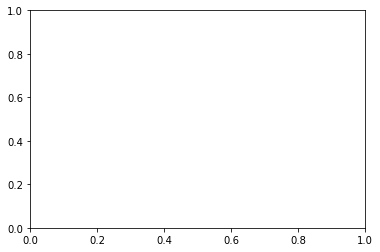

In [19]:
##### Google colabでは、動作を確認済！！！

plt_result(X_train, kmeans.cluster_centers_, xx)



## 6.サポートベクターマシーン
### 6.1 サポートベクターマシン　Report
### 6.1.1 サポートベクターマシンとは。
#### &emsp;&emsp;&emsp; SVMは教師あり学習の一種で分類問題を処理するための手法です。
#### &emsp;&emsp;&emsp; 境界線に近い点をサポートベクトルと呼び、サポートベクトルを最大化するように、境界線を引くようにする。
####  
####  &emsp;&emsp;&emsp; 6.1.2 カーネル関数の種類
####   &emsp;&emsp;&emsp;　線形分離出来ない場合、特徴空間上で線形分離することを考える。この場合カーネル関数（カーネルトリック）を使って対応する。

##### &emsp;&emsp;&emsp; 6.1.2.1 カーネル関数の種類：
#####  &emsp;&emsp;&emsp; カーネル関数には以下の種類が有ります。
#####  &emsp;&emsp;&emsp; 線形カーネル
##### &emsp;&emsp;&emsp;  多項式カーネル
#####  &emsp;&emsp;&emsp; RBFカーネル(Radial basis function kernel)
#####  &emsp;&emsp;&emsp; シグモイドカーネル　

#### 決定境界引く際に
#### &emsp;&emsp;&emsp; 誤判別を許容することを想定：ソフトマージン
#### &emsp;&emsp;&emsp; はっきり分類出来る状態　　  ：ハードマージン
#### という。
####  ソフトマージンの決定境界の決め方
##### 　- 境界線とデータはなるべく離れる
##### 　- 誤判定はなるべく少なく
##### ただし、パラメータ$C$はマージンの大きさと誤差の許容度のトレードオフを決めるパラメータである。この最適化問題をラグランジュ乗数法などを用いると、結局最大化する目的関数はハードマージンSVMと同じとなる。

#### $\tilde{L}(\boldsymbol{a}) = \sum_{i=1}^{n} a_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} a_{i} a_{j} t_{i} t_{j} \phi(\boldsymbol{x}_{i})^{\mathrm{T}} \phi(\boldsymbol{x}_{j})$

##### ただし、制約条件が$a_{i} \ge 0$の代わりに$0 \le a_{i} \le C (i = 1, 2, ..., n)$となる。（ハードマージンSVMと同じ$\sum_{i=1}^{n} a_{i} t_{i} = 0$も制約条件）


### 6.2 サポートベクターマシーン　ハンドオフ

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [37]:
### 訓練データ生成① （線形分離可能）

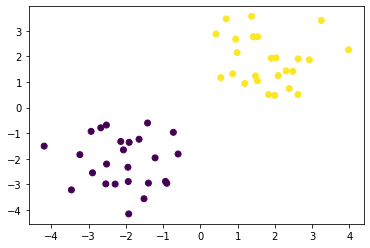

In [38]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    X_train = np.concatenate([x0, x1])
    ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return X_train, ys_train
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

In [39]:
### 学習
t = np.where(ys_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

eta1 = 0.01
eta2 = 0.001
n_iter = 500

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

In [40]:
### 予測
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [41]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

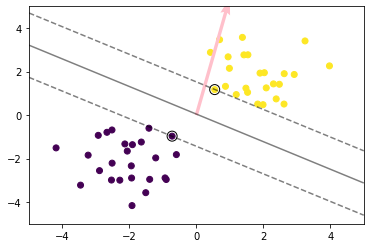

In [42]:
# 訓練データを可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
#plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


# マージンと決定境界を可視化
plt.quiver(0, 0, 0.1, 0.35, width=0.01, scale=1, color='pink')

In [43]:
#### 訓練データ生成② （線形分離不可能）
factor = .2
n_samples = 50
linspace = np.linspace(0, 2 * np.pi, n_samples // 2 + 1)[:-1]
outer_circ_x = np.cos(linspace)
outer_circ_y = np.sin(linspace)
inner_circ_x = outer_circ_x * factor
inner_circ_y = outer_circ_y * factor

X = np.vstack((np.append(outer_circ_x, inner_circ_x),
               np.append(outer_circ_y, inner_circ_y))).T
y = np.hstack([np.zeros(n_samples // 2, dtype=np.intp),
               np.ones(n_samples // 2, dtype=np.intp)])
X += np.random.normal(scale=0.15, size=X.shape)
x_train = X
y_train = y


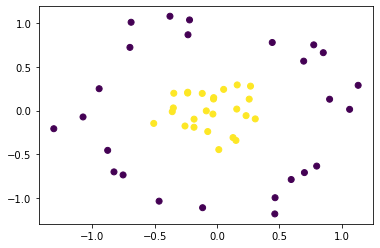

In [44]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

In [45]:
#### 学習
##### 元のデータ空間では線形分離は出来ないが、特徴空間上で線形分離することを考える。
##### 今回はカーネルとしてRBFカーネル（ガウシアンカーネル）を利用する。
def rbf(u, v):
        sigma = 0.8
        return np.exp(-0.5 * ((u - v)**2).sum() / sigma**2)
    
X_train = x_train
t = np.where(y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# RBFカーネル
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf(X_train[i], X_train[j])

eta1 = 0.01
eta2 = 0.001
n_iter = 5000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)
    

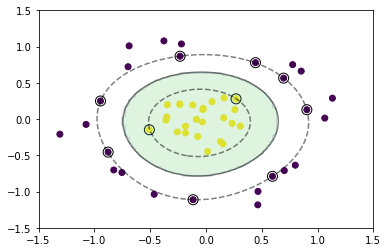

In [46]:
#### 予測
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

xx0, xx1 = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * rbf(X_test[i], sv)
y_pred = np.sign(y_project)


# 訓練データを可視化
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])



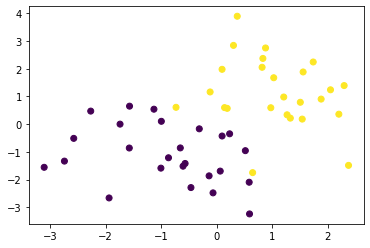

In [47]:
##### ソフトマージンSVM
##### 訓練データ生成③（重なりあり）
x0 = np.random.normal(size=50).reshape(-1, 2) - 1.
x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
x_train = np.concatenate([x0, x1])
y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

In [48]:
#### 学習
X_train = x_train
t = np.where(y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

C = 1
eta1 = 0.01
eta2 = 0.001
n_iter = 1000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.clip(a, 0, C)
    

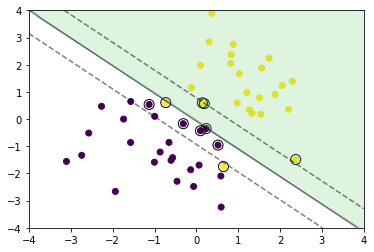

In [49]:
#### 予測
index = a > 1e-8
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()


xx0, xx1 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

# 訓練データを可視化
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

